In [1]:
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import sys
import numpy as np

In [2]:
def equalization(gray_value):
    """
    传入灰度值，对灰度值做均衡化，不需要返回，直接修改传入的参数
    :param gray_value:
    """
    # 统计灰度直方图
    gray = np.zeros(256)
    row, column = gray_value.shape
    for i in range(row):
        for j in range(column):
            gray[gray_value[i][j]] += 1

    # 计算灰度占比
    gray /= (row * column)
    # 显示灰度直方图
    plt.subplot(2, 2, 2)
    plt.plot(gray)

    cumsum = np.cumsum(gray)  # 计算累积和 求积分值

    # 均衡化
    # equa_t[i]=j表示原灰度值i经过均衡化后转化为灰度值j
    # 255×累积和四舍五入为int型
    equa_t = np.array((255 * cumsum + 0.5)).astype(np.int32)
    # 统计均衡化后的灰度数量
    equa_gray = np.zeros(256)
    for i in range(256):
        equa_gray[equa_t[i]] += gray[i]
    # 显示均衡化后的直方图
    plt.subplot(2, 2, 4)
    plt.plot(equa_gray)
    # 对原灰度矩阵做均衡化
    for i in range(row):
        for j in range(column):
            gray_value[i][j] = equa_t[gray_value[i][j]]

In [3]:
def run(img_path):
    img_array = mpimg.imread(img_path)
    plt.subplot(2, 2, 1)
    plt.imshow(img_array)
    img_array = img_array.astype(np.int32)
    equalization(img_array[:, :, 0])
    equalization(img_array[:, :, 1])
    equalization(img_array[:, :, 2])
    img_array = img_array.astype(np.float64)
    img_array /= 255
    plt.subplot(2, 2, 3)
    plt.imshow(img_array)

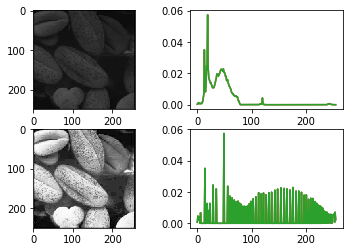

In [4]:
run('test.jpg')
plt.show()

<class 'numpy.ndarray'>


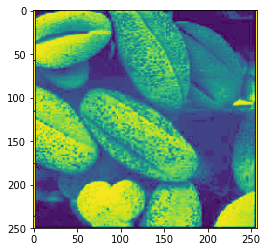

In [12]:
import cv2

img = cv2.imread('test.jpg')
print(type(img))
grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#直方图均衡化
equ = cv2.equalizeHist(grey)
# cv2.imshow("equalHist_demo",equ)
# cv2.waitKey(0)
plt.imshow(equ)
plt.show()
